In [1]:
import pandas as pd
phase='full'
if phase=='pilot':
    df=pd.read_csv("2d 4d8s cloud2 n=40.csv")#.iloc[439].stimulus
else:
    df=pd.read_csv("2d 4d8s prereg n=209.csv")#.iloc[439].stimulus
df=df[df.task=="testing_categorize_corners"]
#df=df[~df.wid.isin(['w887015b'])]#,'w28122f0','w2f812aa','w4623097','w4725cde','we581056','wc6c18a2','wce48bea'])]
# df=df[~df.wid.isin(['wbc8123d'])]
df=df[~df.wid.isin(['w04c10d7','w07c35f2','weaefdba','wc79e473','wc3c57b8','wb520c18','wabd1807','w930c230','w92d5ece','w272d959','w2f82fbb','w0c71a4e','w15d41a7','w02ea469'])] #remove test trial, and broken double trial
df
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def idx2coords(idxs):
    # print (idxs)
    x=idxs%20
    y=idxs//20
    return x,y
cmap = plt.get_cmap('tab10')
df

,Unnamed: 0,wid,task,response,target_dino,condition
0,9,w6d6838f,testing_categorize_corners,0,12.0,0
1,10,w6d6838f,testing_categorize_corners,4,248.0,0
2,11,w6d6838f,testing_categorize_corners,4,366.0,0
3,12,w6d6838f,testing_categorize_corners,6,122.0,0
4,13,w6d6838f,testing_categorize_corners,2,58.0,0
...,...,...,...,...,...,...
21295,28187,w5f57b45,testing_categorize_corners,4,332.0,0
21296,28188,w5f57b45,testing_categorize_corners,6,362.0,0
21297,28189,w5f57b45,testing_categorize_corners,6,164.0,0
21298,28190,w5f57b45,testing_categorize_corners,2,216.0,0


In [5]:
maybe_exclude=[
'wf7561d6',
'weaefdba',
'wc79e473',
'wc3c57b8',
'wb520c18',
'wabd1807',
'w930c230',
'w92d5ece',
'w272d959',
'w2f82fbb',
'w0c71a4e',
'w15d41a7',
'w02ea469',
'w07c35f2']
print(len(df.wid.unique()))
for m in maybe_exclude:
    if m in df.wid.unique():
        print (m)

195


In [49]:
gdf=df.groupby(['wid','response'])['response'].describe()
gdf[gdf['count']>40]

count  mean  std  min  25%  50%  75%  max
wid      response                                           
w09d2aae 0          52.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
w26db917 2          46.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
         3          48.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
         5          55.0   5.0  0.0  5.0  5.0  5.0  5.0  5.0
         6          48.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w41e3d88 6          43.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w4e108df 6          47.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w70d96e1 6          43.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w7d28452 2          41.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w8066c85 6          52.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0

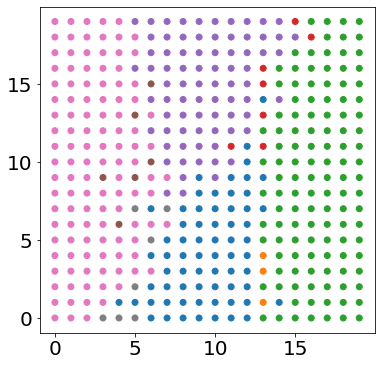

In [38]:
plt.figure(figsize=(6,6))


# create a dictionary to store unique coordinates and their responses
coord_dict = {}
x,y=idx2coords(np.array(df.target_dino.values))
for i in range(len(x)):
    coord = (x[i], y[i])
    if coord not in coord_dict:
        coord_dict[coord] = []
    coord_dict[coord]=df[df.target_dino==coord[1]*20+coord[0]].response.values

# find the most common response for each unique coordinate
coords = []
most_common = []
for coord in coord_dict:
    coords.append(coord)
    most_common.append(Counter(coord_dict[coord]).most_common(1)[0][0])
# print(most_common)
plt.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c=most_common, cmap=cmap,vmin=-0.5, vmax=9.5)
# plt.show()
plt.savefig(f'2djoint_{phase}.png')


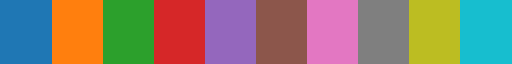

In [5]:
cmap

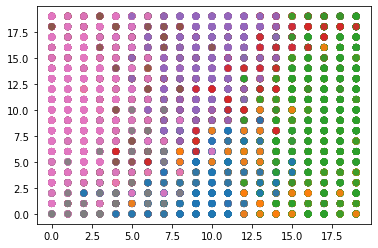

In [6]:
plt.scatter(x,y,c=df.response,cmap=cmap, alpha=.9, vmin=-0.5, vmax=9.5)
# plt.savefig('2djoint.png')

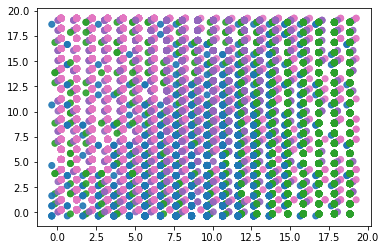

In [7]:
df1=df[~df.response.isin([1,3,5,7])]
x1,y1=idx2coords(np.array(df1.target_dino.values))
plt.scatter(x1+(df1.response-3.5)*.1,y1+(df1.response-3.5)*.1,c=df1.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

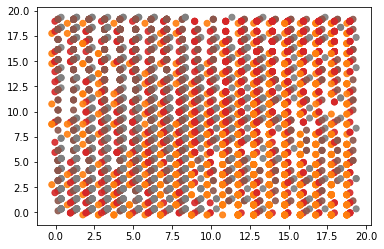

In [8]:
df2=df[df.response.isin([1,3,5,7])]
x2,y2=idx2coords(np.array(df2.target_dino.values))
plt.scatter(x2+(df2.response-3.5)*.1,y2+(df2.response-3.5)*.1,c=df2.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

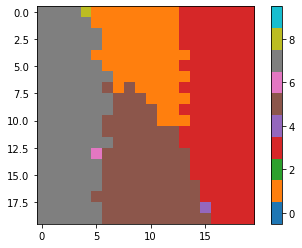

In [9]:
# create 2D array of most common responses
n_rows = int(max(y)) + 1
n_cols = int(max(x)) + 1
response_array = np.zeros((n_rows, n_cols))
for i in range(len(coords)):
    row = int(coords[i][1])
    col = int(coords[i][0])
    response_array[row, col] = most_common[i]+1

# define color map
cmap = plt.get_cmap('tab10')

# plot response array as a solid matrix
plt.imshow(response_array, cmap=cmap, interpolation='nearest', vmin=-0.5, vmax=9.5)

# add color bar legend
cbar = plt.colorbar()

In [8]:
plt.rcParams.update({'font.size': 20})

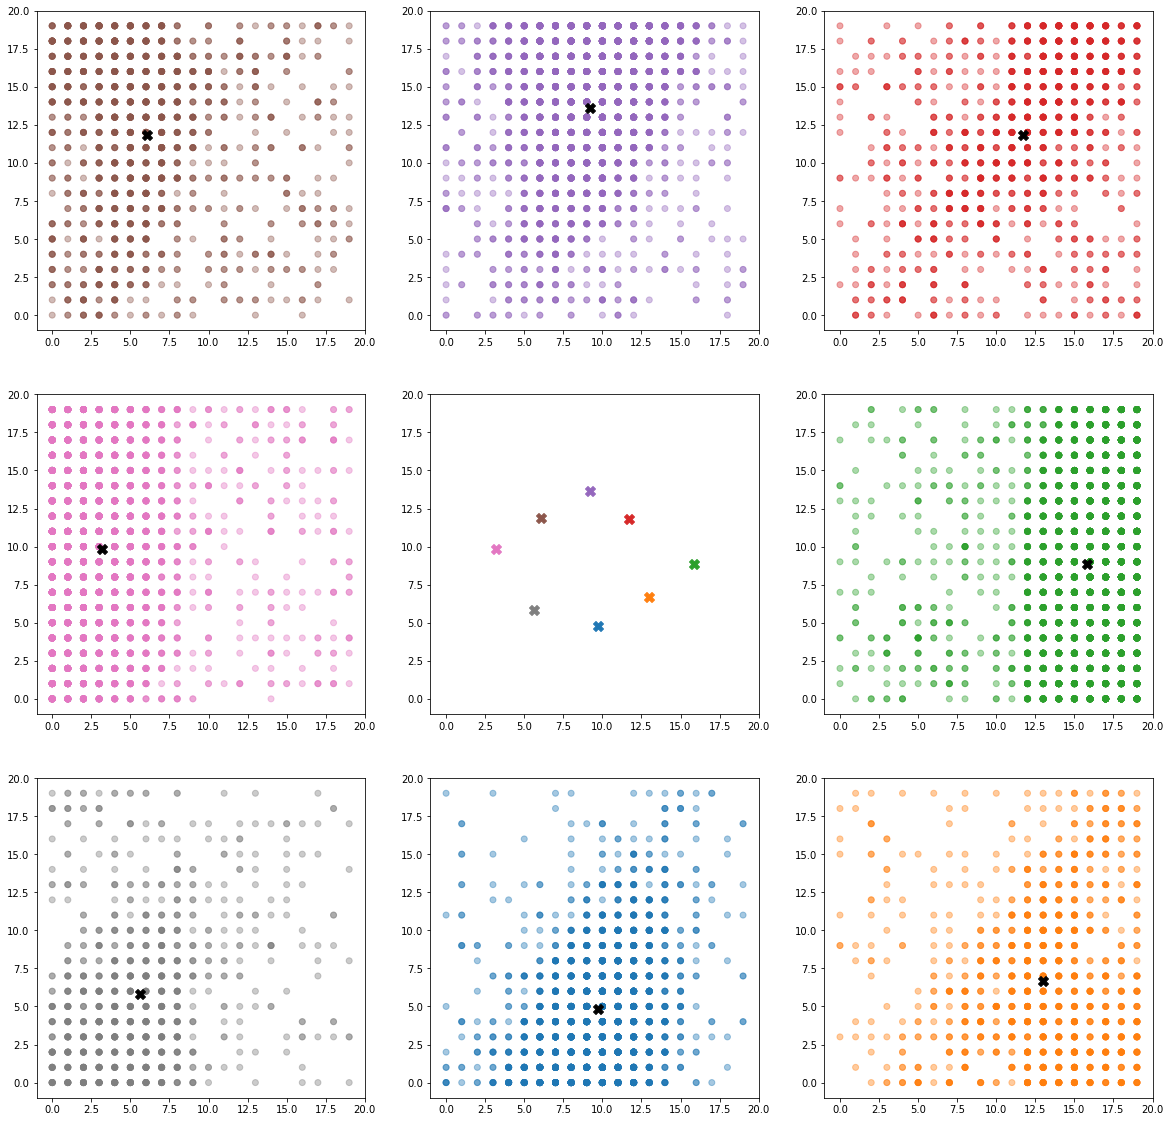

In [2]:
# order=[7,8,9,6,3,2,1,4]


    
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
plt.figure(figsize=(20,20))
for i in sorted(df.response.unique()):
    dft=df[df.response.isin([i])]
    xt,yt=idx2coords(np.array(dft.target_dino.values))
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.4, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    plt.subplot(3,3,5)
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    # plt.show()
    

    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2d_{phase}.png')

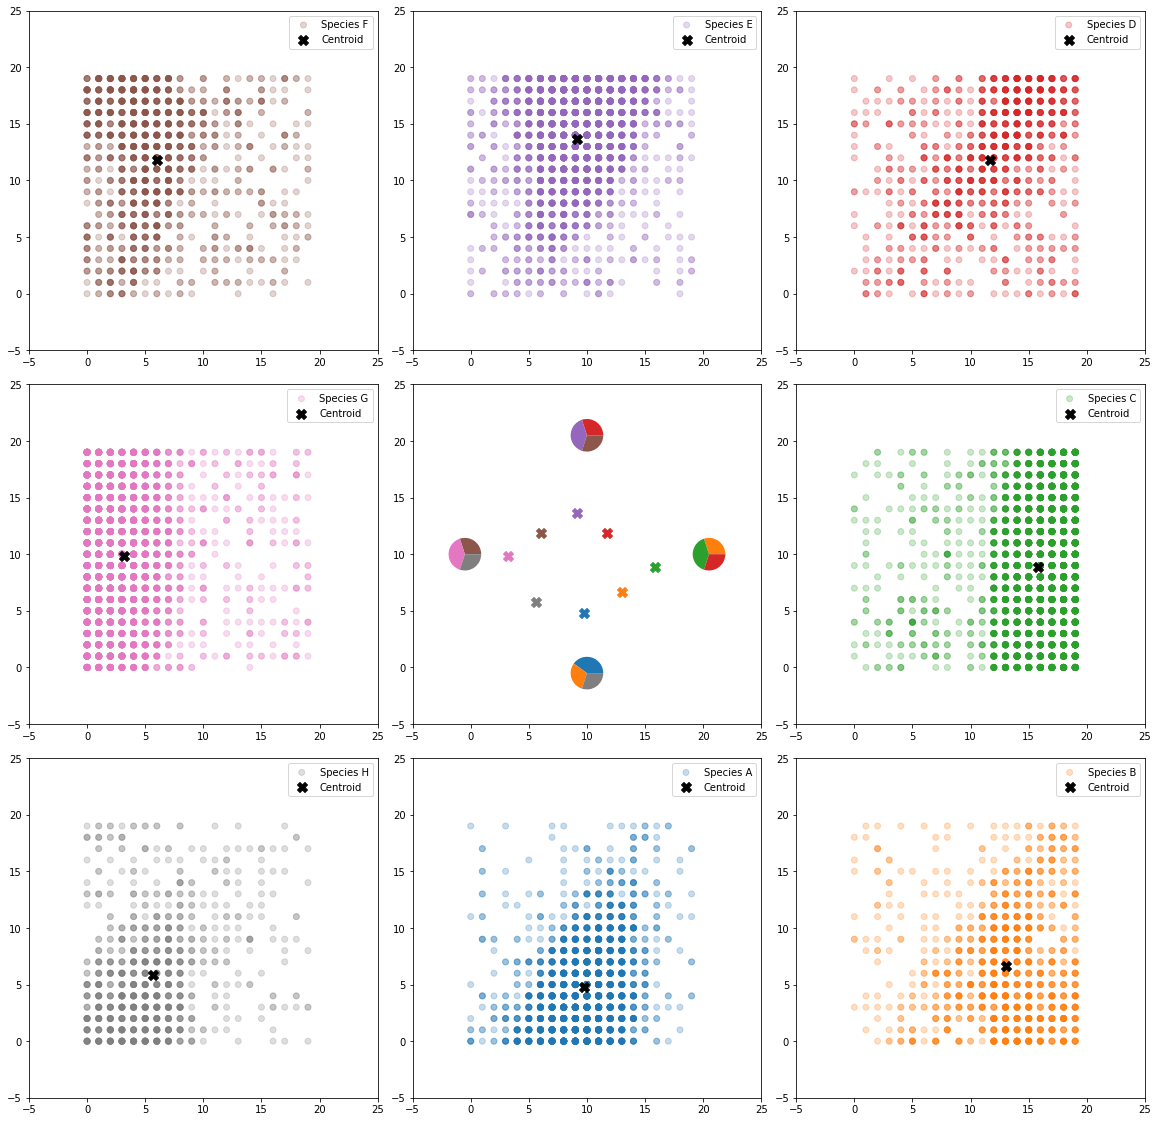

In [3]:
# order=[7,8,9,6,3,2,1,4]
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
locs=[[10,0],
      [19,10],
      [10,19],
      [0,10]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
species='ABCDEFGH'
plt.figure(figsize=(20,20))
ax=plt.subplot(3,3,5)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
for i in range(4):
    ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
    ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    ax_pie1.set_xticks([])
    ax_pie1.set_yticks([])

for i in sorted(df.response.unique()):
    dft=df[df.response.isin([i])]
    xt,yt=idx2coords(np.array(dft.target_dino.values))
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.25, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(3,3,5)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
plt.subplots_adjust(wspace=0.1, hspace=0.1)


    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2dwpies_{phase}.png')

In [70]:

def goodness_of_fit_gpc(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8):
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
    from sklearn.gaussian_process import GaussianProcessClassifier as GPC
    epse=0.000001
    train_locs=np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),(x6,y6),(x7,y7),(x8,y8)])
    train_labs = np.eye(8)
    kernel = RBF(length_scale=[5], length_scale_bounds=[0.0,1000000])
    # kernel=RationalQuadratic()
    gpc = GPC(kernel=kernel,random_state=0)
    gpc.fit(train_locs,np.argmax(train_labs,axis=1))
    probs=gpc.predict_proba(np.array(locs))
    return -rel_entr(probs,(np.array(dinos)+eps)/100).sum()

def goodness_of_fit_gpr(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8):
    from sklearn.gaussian_process import GaussianProcessRegressor as GPR
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
    eps=0.000001
    train_locs=np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),(x6,y6),(x7,y7),(x8,y8)])
    train_labs = np.eye(8)
    kernel = RBF(length_scale=[3,6], length_scale_bounds=[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
    # kernel=RationalQuadratic()
    gpr = GPR(kernel=kernel,random_state=0)
    gpr.fit(train_locs,train_labs)
    probs=gpr.predict(np.array(locs))
    probs=softmax(probs)
    return -np.sum((probs-(np.array(dinos)/100))**2)
    #return -rel_entr(probs,(np.array(dinos)+eps)/100).sum()

def goodness_of_fit_4nnexpdw(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8):
    train_locs=np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),(x6,y6),(x7,y7),(x8,y8)])
    train_labs = np.eye(8)
    dists=np.exp(get_dists_v2(locs,train_locs))
    closest_idx=np.argsort(dists,axis=-1)[:,0]
    closest_idx2=np.argsort(dists,axis=-1)[:,1]
    closest_idx3=np.argsort(dists,axis=-1)[:,2]
    closest_idx4=np.argsort(dists,axis=-1)[:,3]
    # print(closest_idx)
    probs=(np.array(train_labs)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
           +np.array(train_labs)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
           +np.array(train_labs)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
           +np.array(train_labs)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
          )
    probs=probs/np.sum(probs,axis=-1)[:, np.newaxis]
    print(probs.shape)
    return -np.sum((probs-(np.array(dinos)/100))**2)

        

def get_dists(vectors):
    vectors = np.array(vectors)
    target_vectors = np.array(locs)

    # Reshape the arrays to enable broadcasting
    vectors = vectors[:, np.newaxis, :]#*[1.5,1]
    target_vectors = target_vectors[np.newaxis, :, :]#*[1.5,1]

    # Compute the Euclidean distance using vectorized operations
    distances = np.sqrt(np.sum(((vectors - target_vectors)*np.array([1.7,1])) ** 2, axis=-1))
    # distances = np.sqrt(np.sum(((vectors - target_vectors)*np.array([1,1])) ** 2, axis=-1))
    return distances

def get_dists_v2(vectors,target_vectors):
    vectors = np.array(vectors)
    target_vectors = np.array(target_vectors)

    # Reshape the arrays to enable broadcasting
    vectors = vectors[:, np.newaxis, :]#*[1.5,1]
    target_vectors = target_vectors[np.newaxis, :, :]#*[1.5,1]

    # Compute the Euclidean distance using vectorized operations
    # distances = np.sqrt(np.sum(((vectors - target_vectors)*np.array([1.7,1])) ** 2, axis=-1))
    distances = np.sqrt(np.sum(((vectors - target_vectors)*np.array([1.,1])) ** 2, axis=-1))
    return distances

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=-1)[:, np.newaxis]

def one_hot(location, soft_label):
    # Create 100 copies of the location vector
    locations = np.tile(location, (100, 1))

    # Create one-hot labels
    labels = np.zeros((100, len(soft_label)), dtype=int)
    count=0
    for i, label in enumerate(soft_label):
        num_ones = label
        labels[count:count+num_ones, i] = 1
        count+=num_ones

    return locations, labels

def simulate_soft(points, model='1nn'):
    OH_locs=[]
    if model=='1nn':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        # print(closest_idx)
        probs=np.array(dinos)[closest_idx].reshape((20,20,8))/1
    if model=='2nn':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]+np.array(dinos)[closest_idx2]).reshape((20,20,8))/2
    if model=='2nn_dw':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='2nn_dw2':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='4nn_dw2':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='4nn_dw2_softmax':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*softmax(probs)).reshape((20,20,8))
        print(probs.shape)
    if model=='2nn_dw4':
        dists=get_dists(points)**4
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='4nn_dw4':
        dists=get_dists(points)**4
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='2nn_expdw':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='4nn_expdw':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='4nn_expdw_softmax':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*softmax(probs)).reshape((20,20,8))
        print(probs.shape)
    if model=='gpr':
        from sklearn.gaussian_process import GaussianProcessRegressor as GPR
        from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
        kernel = RBF(length_scale=[5,7.5], length_scale_bounds=[0.01,100])#'fixed')#[0.01,100])
        # kernel=RationalQuadratic()
        gpr = GPR(kernel=kernel,random_state=0)
        gpr.fit(locs,dinos)
        probs=gpr.predict(points)
        probs=(probs-np.min(probs,axis=-1).reshape((-1,1)))/(np.max(probs, axis=-1).reshape((-1,1))-np.min(probs,axis=-1).reshape((-1,1)))
        # probs=(100*softmax(probs)).reshape((20,20,8))
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
        # print(np.sum(probs, axis=-1))
        print(gpr.kernel_)
    if model=='gpr-softmax':
        from sklearn.gaussian_process import GaussianProcessRegressor as GPR
        from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
        kernel = RBF(length_scale=[3,3*1.7], length_scale_bounds='fixed')#[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
        #kernel = RBF(length_scale=[3,3*1], length_scale_bounds='fixed')#[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
        # kernel=RationalQuadratic()
        gpr = GPR(kernel=kernel,random_state=0)
        gpr.fit(locs,dinos)
        probs=gpr.predict(points)
        probs=(100*softmax(probs)).reshape((20,20,8))
        # probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
        print(gpr.kernel_)
    if model=='inverse-gpr-softmax':
        from bayes_opt import BayesianOptimization
        from sklearn.gaussian_process import GaussianProcessRegressor as GPR
        from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
        
        pbounds = {'x1': (-80, 100), 'y1': (-80, 100),
                  'x2': (-80, 100), 'y2': (-80, 100),
                  'x3': (-80, 100), 'y3': (-80, 100),
                  'x4': (-80, 100), 'y4': (-80, 100),
                  'x5': (-80, 100), 'y5': (-80, 100),
                  'x6': (-80, 100), 'y6': (-80, 100),
                  'x7': (-80, 100), 'y7': (-80, 100),
                  'x8': (-80, 100), 'y8': (-80, 100),}

        optimizer = BayesianOptimization(
            f=goodness_of_fit_gpr,
            pbounds=pbounds,
            random_state=1,
            verbose=1
        )
        optimizer.maximize(
            init_points=1000,
            n_iter=65,
            #verbose=0
        )
        results=optimizer.max
        print(results)
        result_locs = results['params']
        OH_locs = [[result_locs['x1'],result_locs['y1']],[result_locs['x2'],result_locs['y2']],
                   [result_locs['x3'],result_locs['y3']],[result_locs['x4'],result_locs['y4']],
                   [result_locs['x5'],result_locs['y5']],[result_locs['x6'],result_locs['y6']],
                   [result_locs['x7'],result_locs['y7']],[result_locs['x8'],result_locs['y8']]]
        OH_labs = np.eye(8)
        OH_locs=np.vstack([OH_locs])
        OH_labs=np.vstack([OH_labs])
        kernel = RBF(length_scale=[3,3*1.7], length_scale_bounds='fixed')#[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
        # kernel=RationalQuadratic()
        gpr = GPR(kernel=kernel,random_state=0)
        gpr.fit(OH_locs,OH_labs)
        probs=gpr.predict(points)
        probs=(100*softmax(probs)).reshape((20,20,8))
        # probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
        print(gpr.kernel_)
    if model=='inverse-4nnexpdw':
        from bayes_opt import BayesianOptimization

        
        pbounds = {'x1': (-80, 100), 'y1': (-80, 100),
                  'x2': (-80, 100), 'y2': (-80, 100),
                  'x3': (-80, 100), 'y3': (-80, 100),
                  'x4': (-80, 100), 'y4': (-80, 100),
                  'x5': (-80, 100), 'y5': (-80, 100),
                  'x6': (-80, 100), 'y6': (-80, 100),
                  'x7': (-80, 100), 'y7': (-80, 100),
                  'x8': (-80, 100), 'y8': (-80, 100),}

        optimizer = BayesianOptimization(
            f=goodness_of_fit_4nnexpdw,
            pbounds=pbounds,
            random_state=1,
            verbose=1
        )
        optimizer.maximize(
            init_points=800,
            n_iter=65,
            verbose=1
        )
        results=optimizer.max
        print(results)
        result_locs = results['params']
        OH_locs = [[result_locs['x1'],result_locs['y1']],[result_locs['x2'],result_locs['y2']],
                   [result_locs['x3'],result_locs['y3']],[result_locs['x4'],result_locs['y4']],
                   [result_locs['x5'],result_locs['y5']],[result_locs['x6'],result_locs['y6']],
                   [result_locs['x7'],result_locs['y7']],[result_locs['x8'],result_locs['y8']]]
        OH_labs = np.eye(8)
        # OH_locs=np.vstack([OH_locs])
        # OH_labs=np.vstack([OH_labs])
        dists=np.exp(get_dists_v2(points,OH_locs))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(OH_labs)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(OH_labs)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(OH_labs)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(OH_labs)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        # probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
    if model=='peaks':
        OH_locs=[]
        OH_labs=np.eye(8)
        for i in range(8):
            print(f"Class {i}")
            temp_locs=[]
            for j1 in range(0,4):
                for j2 in range(j1,4):
                    
                    if (dinos[j1][i]!=0) or (dinos[j2][i]!=0):
                        diff=(dinos[j2][i]/100)-(dinos[j1][i]/100)
                        if diff==0:
                            shift=-0.5
                        else:
                            shift=(1-(dinos[j2][i]/100))/diff
                        print(shift)
                        dist = (np.array(locs)[j2]-np.array(locs)[j1])#*np.array([1.7,1])
                        temp_loc = np.array(locs)[j2]+(shift*dist)
                        temp_locs.append(temp_loc)
            OH_locs.append(np.mean(temp_locs, axis=0))
        OH_locs=20*(OH_locs - np.min(OH_locs))/(np.max(OH_locs)-np.min(OH_locs))
        # OH_locs=20*(OH_locs - np.min(OH_locs, axis=0))/(np.max(OH_locs, axis=0)-np.min(OH_locs, axis=0))
        dists=np.exp(get_dists_v2(points,OH_locs))
        # dists=get_dists_v2(points,OH_locs)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        closest_idx5=np.argsort(dists,axis=-1)[:,4]
        closest_idx6=np.argsort(dists,axis=-1)[:,5]
        closest_idx7=np.argsort(dists,axis=-1)[:,6]
        closest_idx8=np.argsort(dists,axis=-1)[:,7]
        # print(closest_idx)
        probs=(np.array(OH_labs)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(OH_labs)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(OH_labs)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(OH_labs)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
               +np.array(OH_labs)[closest_idx5]/np.sort(dists)[:,4][:, np.newaxis]
               +np.array(OH_labs)[closest_idx6]/np.sort(dists)[:,5][:, np.newaxis]
               +np.array(OH_labs)[closest_idx7]/np.sort(dists)[:,6][:, np.newaxis]
               +np.array(OH_labs)[closest_idx8]/np.sort(dists)[:,7][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        # probs=(100*softmax(probs)).reshape((20,20,8))
        # probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,8))
        print(probs.shape)
        print(OH_locs)
    if model=='gpc':
        from sklearn.gaussian_process import GaussianProcessClassifier as GPC
        from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
        OH_locs=[]
        OH_labs=[]
        for i in range(len(dinos)):
            oh_locs,oh_labs=one_hot(locs[i],dinos[i])
            OH_locs.append(oh_locs)
            OH_labs.append(oh_labs)
        OH_locs=np.concatenate(OH_locs)#*[1.5,1]
        OH_labs=np.concatenate(OH_labs)
        kernel = RBF(length_scale=[5], length_scale_bounds=[0.0,100000])
        # kernel=RationalQuadratic()
        gpc = GPC(kernel=kernel,random_state=0)
        gpc.fit(OH_locs,np.argmax(OH_labs,axis=1))
        probs=100*gpc.predict_proba(np.array(points)).reshape((20,20,8))
        print(probs.shape)
        print(gpc.kernel_)
    if model=='inverse-gpc':
        from bayes_opt import BayesianOptimization
        from sklearn.gaussian_process import GaussianProcessClassifier as GPC
        from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
        # Bounded region of parameter space
        pbounds = {'x1': (-80, 100), 'y1': (-80, 100),
                  'x2': (-80, 100), 'y2': (-80, 100),
                  'x3': (-80, 100), 'y3': (-80, 100),
                  'x4': (-80, 100), 'y4': (-80, 100),
                  'x5': (-80, 100), 'y5': (-80, 100),
                  'x6': (-80, 100), 'y6': (-80, 100),
                  'x7': (-80, 100), 'y7': (-80, 100),
                  'x8': (-80, 100), 'y8': (-80, 100),}

        optimizer = BayesianOptimization(
            f=goodness_of_fit_gpc,
            pbounds=pbounds,
            random_state=1,
            verbose=1
        )
        optimizer.maximize(
            init_points=200,
            n_iter=65,
            #verbose=0
        )
        results=optimizer.max
        print(results)
        result_locs = results['params']
        OH_locs = [[result_locs['x1'],result_locs['y1']],[result_locs['x2'],result_locs['y2']],
                   [result_locs['x3'],result_locs['y3']],[result_locs['x4'],result_locs['y4']],
                   [result_locs['x5'],result_locs['y5']],[result_locs['x6'],result_locs['y6']],
                   [result_locs['x7'],result_locs['y7']],[result_locs['x8'],result_locs['y8']]]
        OH_labs = np.eye(8)
        kernel = RBF(length_scale=[5], length_scale_bounds=[0.0,1000000])
        # kernel=RationalQuadratic()
        gpc = GPC(kernel=kernel,random_state=0)
        gpc.fit(OH_locs,np.argmax(OH_labs,axis=1))
        probs=100*gpc.predict_proba(np.array(points)).reshape((20,20,8))
        print(probs.shape)
        print(gpc.kernel_)
        
    arrays = np.array([probs[:, :, i] for i in range(8)])
    # Create coordinate arrays
    x_coords, y_coords = np.meshgrid(np.arange(20), np.arange(20), indexing='ij')

    # Add two new axes to the coordinate arrays to match the shape of the data array
    x_coords = x_coords[np.newaxis, :, :]
    y_coords = y_coords[np.newaxis, :, :]
    # Repeat the coordinate arrays along the first axis to match the data array
    x_coords = np.repeat(x_coords, 8, axis=0)
    y_coords = np.repeat(y_coords, 8, axis=0)
    # Combine the coordinate arrays and the data array
    combined = np.stack((x_coords, y_coords, arrays), axis=-1)

    # Reshape the combined array into an 8x400x3 matrix
    matrix = np.around(combined.reshape(8, -1, 3),0).astype(int)
    # print(matrix)
    simulations=[]
    for i in range(8):
        result=np.array([np.tile(np.array([x, y, i]), (L, 1)) for x, y, L in matrix[i] if L>=0])
        flattened_result = [np.array(item) for sublist in result for item in sublist.tolist()]
        print(np.array(flattened_result).shape)
        simulations.append(np.array(flattened_result).astype(int))
    simulations=np.concatenate(simulations)
    df=pd.DataFrame(simulations, columns=['x','y','response'])
    return df, probs, OH_locs



In [52]:
test=np.array([[1,2],
              [3,4],
              [5,6]])
np.min(test)

1

In [14]:
OH_locs=[]
OH_labs=[]
for i in range(len(dinos)):
    oh_locs,oh_labs=one_hot(locs[i],dinos[i])
    OH_locs.append(oh_locs)
    OH_labs.append(oh_labs)
np.argmax(np.concatenate(OH_labs),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

Class 0
-0.5
-2.5
-2.5
-2.5
Class 1
-0.5
-0.5
-3.3333333333333335
-3.3333333333333335
-0.5
-3.3333333333333335
-3.3333333333333335
Class 2
1.4999999999999998
-0.5
-2.5
-2.5
Class 3
2.3333333333333335
2.3333333333333335
-0.5
-0.5
-3.3333333333333335
-0.5
-3.3333333333333335
Class 4
1.4999999999999998
1.4999999999999998
-0.5
-2.5
Class 5
2.3333333333333335
2.3333333333333335
2.3333333333333335
2.3333333333333335
-0.5
-0.5
-0.5
Class 6
1.4999999999999998
1.4999999999999998
1.4999999999999998
-0.5
Class 7
-0.5
-3.3333333333333335
-3.3333333333333335
-0.5
2.3333333333333335
2.3333333333333335
-0.5
(20, 20, 8)
[[1.05263158e+01 0.00000000e+00]
 [1.75964912e+01 2.92982456e+00]
 [2.00000000e+01 1.05263158e+01]
 [1.75964912e+01 1.75964912e+01]
 [1.05263158e+01 2.00000000e+01]
 [2.92982456e+00 1.75964912e+01]
 [7.47939722e-16 1.05263158e+01]
 [2.92982456e+00 2.92982456e+00]]
(4894, 3)
(5392, 3)
(4144, 3)
(4306, 3)
(4144, 3)
(5392, 3)
(4894, 3)
(6786, 3)


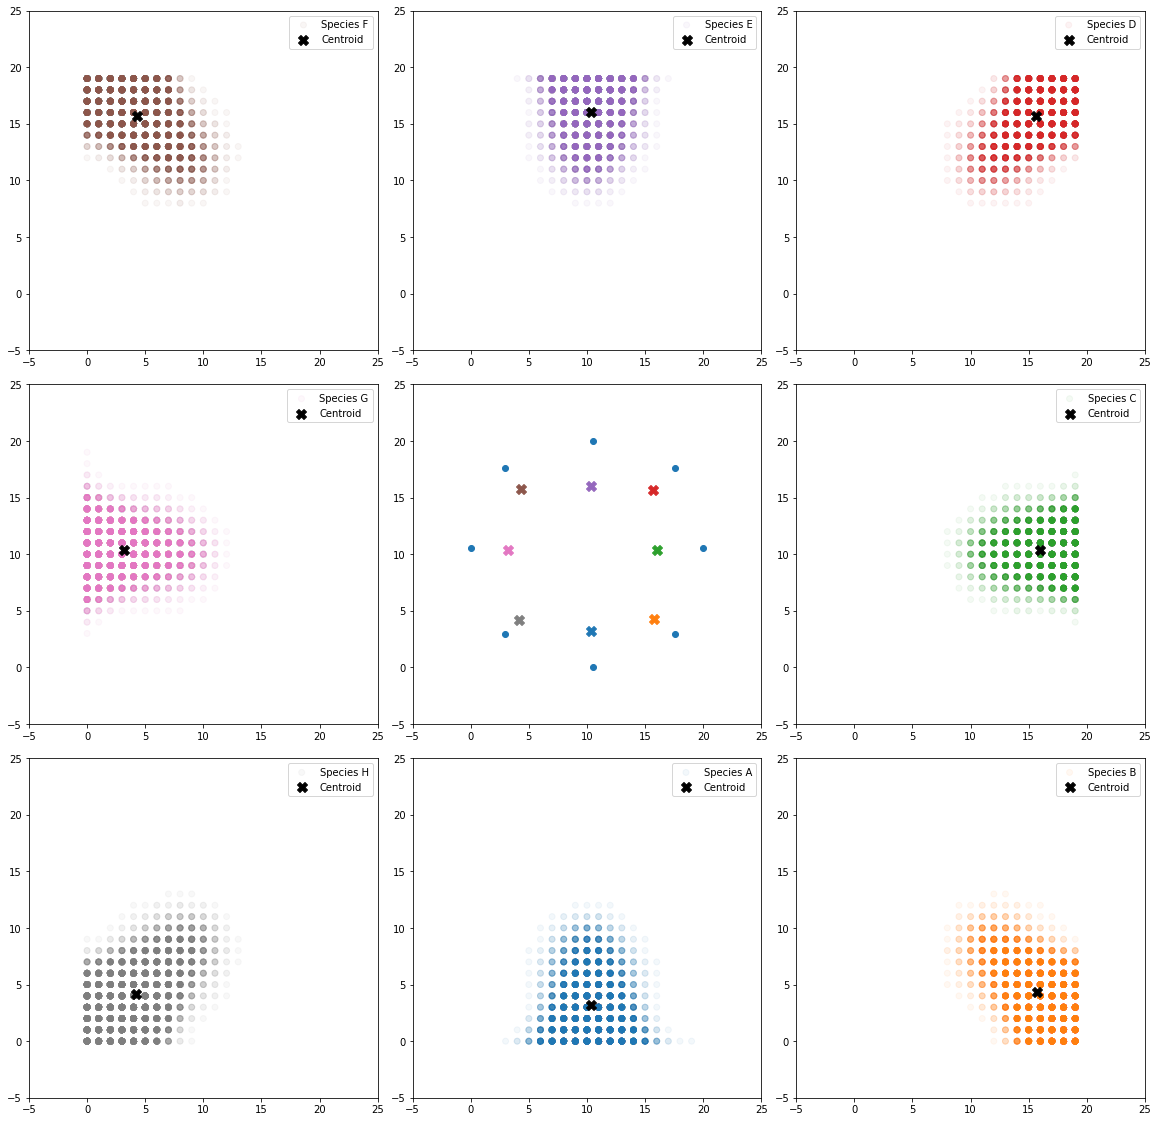

In [71]:
# order=[7,8,9,6,3,2,1,4]
grid_points = [(x, y) for x in range(20) for y in range(20)]
model="peaks"
sim_df1, pred_probs1, OH_true=simulate_soft(grid_points,model)
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
locs=[[10,0],
      [19,10],
      [10,19],
      [0,10]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
species='ABCDEFGH'
plt.figure(figsize=(20,20),)
ax=plt.subplot(3,3,5)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
# for i in range(4):
#     ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
#     ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
#     ax_pie1.set_xticks([])
#     ax_pie1.set_yticks([])

for i in sorted(sim_df1.response.unique()):
    dft=sim_df1[sim_df1.response.isin([i])]
    xt,yt=dft.x,dft.y
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.05, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(3,3,5)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
array=np.array
# OH_true=np.array([[10.52631579,  0.        ],
#  [17.59649123,  2.92982456],
#  [20.,         10.52631579],
#  [17.59649123, 17.59649123],
#  [10.52631579, 20.        ],
#  [ 2.92982456, 17.59649123],
#  [ 0.,         10.52631579],
#  [ 2.92982456,  2.92982456]])
# OH_true=np.array([[10.52631579,  0.        ],
#  [17.59649123,  2.92982456],
#  [20.         ,10.52631579],
#  [17.59649123 ,17.59649123],
#  [10.52631579 ,20.        ],
#  [ 2.92982456 ,17.59649123],
#  [ 0.         ,10.52631579],
#  [ 2.92982456 , 2.92982456]])
plt.scatter(OH_true[:,0],OH_true[:,1])
# plt.xlim((-20,35))
# plt.ylim((-20,35))
    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2d_{model}_wpies_{phase}.png')
sim_df1.response=sim_df1.response.astype(pd.api.types.CategoricalDtype(categories=range(8)))
sim_probs1=sim_df1.groupby(['x','y','response'])['response'].count()/sim_df1.groupby(['x','y'])['response'].count()
sim_probs1=sim_probs1.values.reshape((20,20,8))*100


In [40]:
locs

[[10, 0], [19, 10], [10, 19], [0, 10]]

(20, 20, 8)
(3955, 3)
(5902, 3)
(3911, 3)
(5791, 3)
(3809, 3)
(6098, 3)
(4319, 3)
(6209, 3)


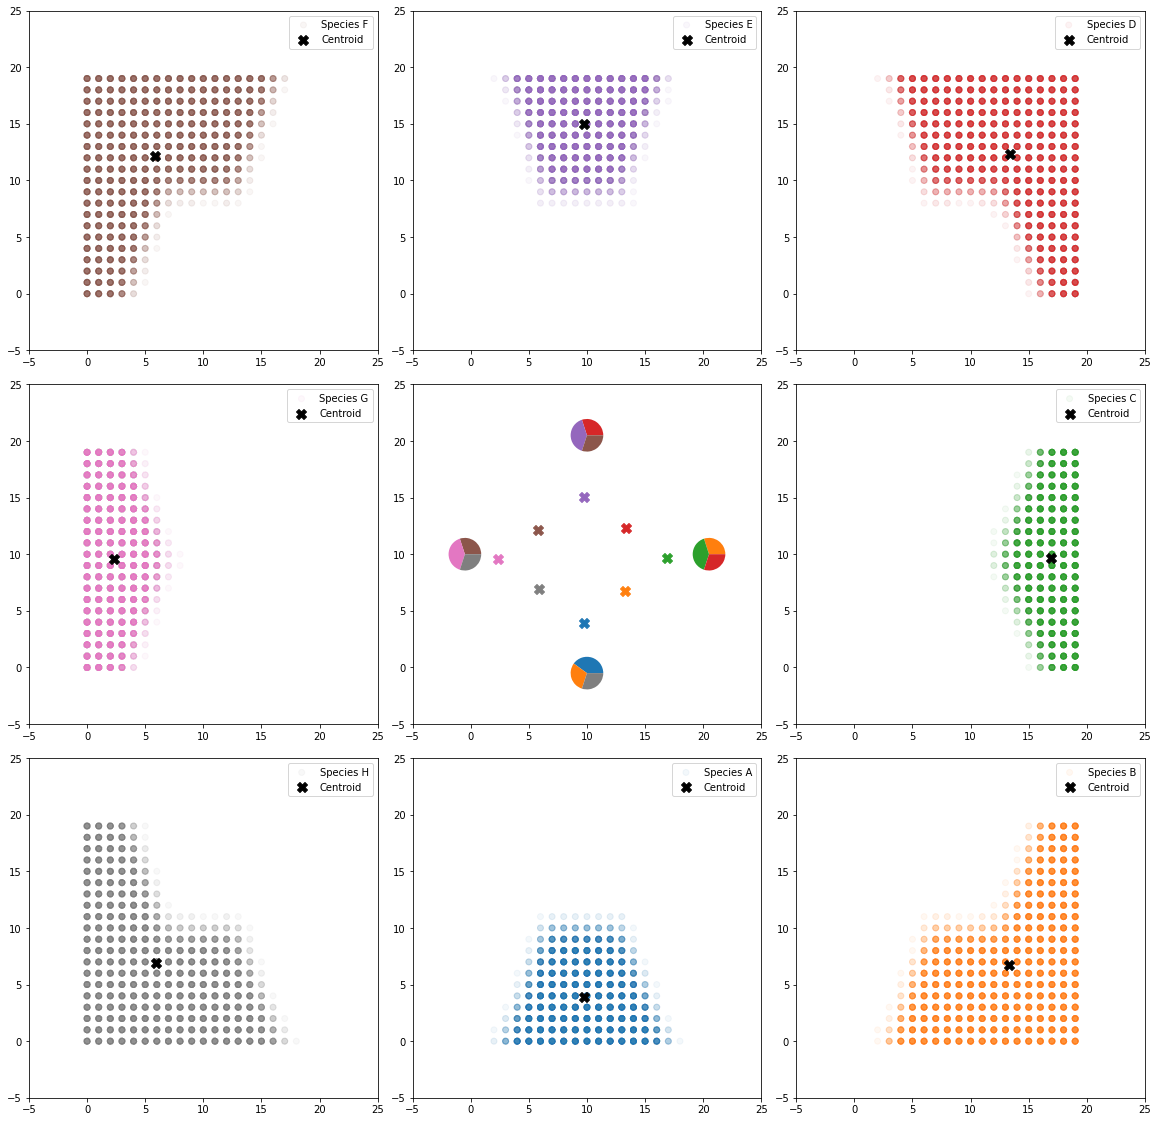

In [72]:
# order=[7,8,9,6,3,2,1,4]
grid_points = [(x, y) for x in range(20) for y in range(20)]
model="4nn_expdw"
sim_df2, pred_probs2,_=simulate_soft(grid_points,model)
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
locs=[[10,0],
      [19,10],
      [10,19],
      [0,10]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
species='ABCDEFGH'
plt.figure(figsize=(20,20))
ax=plt.subplot(3,3,5)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
for i in range(4):
    ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
    ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    ax_pie1.set_xticks([])
    ax_pie1.set_yticks([])

for i in sorted(sim_df2.response.unique()):
    dft=sim_df2[sim_df2.response.isin([i])]
    xt,yt=dft.x,dft.y
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.05, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(3,3,5)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
plt.subplots_adjust(wspace=0.1, hspace=0.1)


    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2d_{model}_wpies_{phase}.png')
sim_df2.response=sim_df2.response.astype(pd.api.types.CategoricalDtype(categories=range(8)))
sim_probs2=sim_df2.groupby(['x','y','response'])['response'].count()/sim_df2.groupby(['x','y'])['response'].count()
sim_probs2=sim_probs2.values.reshape((20,20,8))*100


In [23]:
# order=[7,8,9,6,3,2,1,4]
import warnings
warnings.filterwarnings("ignore")
grid_points = [(x, y) for x in range(20) for y in range(20)]
model="inverse-gpr-softmax"
sim_df, pred_probs2=simulate_soft(grid_points,model)
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
locs=[[10,0],
      [19,10],
      [10,19],
      [0,10]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
species='ABCDEFGH'
plt.figure(figsize=(20,20))
ax=plt.subplot(3,3,5)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
for i in range(4):
    ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
    ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    ax_pie1.set_xticks([])
    ax_pie1.set_yticks([])

for i in sorted(sim_df.response.unique()):
    dft=sim_df[sim_df.response.isin([i])]
    xt,yt=dft.x,dft.y
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.05, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(3,3,5)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
plt.subplots_adjust(wspace=0.1, hspace=0.1)


    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2d_{model}_wpies_{phase}.png')
sim_df.response=sim_df.response.astype(pd.api.types.CategoricalDtype(categories=range(8)))
sim_probs2=sim_df.groupby(['x','y','response'])['response'].count()/sim_df.groupby(['x','y'])['response'].count()
sim_probs2=sim_probs2.values.reshape((20,20,8))*100


|   iter    |  target   |    x1     |    x2     |    x3     |    x4     |    x5     |    x6     |    x7     |    x8     |    y1     |    y2     |    y3     |    y4     |    y5     |    y6     |    y7     |    y8     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 2         | -0.86     | -4.885    | 20.56     | -54.73    | -44.34    | 64.13     | 94.29     | -23.58    | 44.62     | 77.75     | 81.03     | -64.69    | -72.97    | -49.43    | 78.07     | -62.3     | -4.201    |
| 6         | -0.8036   | 79.0      | 32.26     | 55.17     | -17.2     | -31.41    | 81.26     | -2.944    | 93.67     | 39.42     | 31.91     | -59.35    | 90.91     | 0.9842    | 24.11     | -6.535    | -37.34    |
| 94        | -0.7636   | -28.96    | -30.57    | 19.26     | -46.65    | -0.4218   | -46.64    | 90.53     | 8.888     | 93.51 

KeyboardInterrupt: 

In [73]:
from scipy.special import kl_div, rel_entr
eps=.000001
x,y=idx2coords(np.array(df.target_dino.values))
df['x']=x
df['y']=y
df.response=df.response.astype(pd.api.types.CategoricalDtype(categories=range(8)))
human_probs = 100*df.groupby(['x','y','response'])['response'].count()/df.groupby(['x','y'])['response'].count()
human_probs=human_probs.values.reshape((20,20,8))
def score(probs1,probs2):
    # return np.sum(2*50*rel_entr((probs1+eps)/100, (probs2+eps)/100), axis=-1)
    # return np.sum(((1+probs1-probs2-1)**2)/(1+probs2), axis=-1)
    return rel_entr((probs1+eps)/100, (probs2+eps)/100).sum(axis=-1)
np.mean(score(pred_probs1,human_probs)),np.mean(score(pred_probs2,human_probs))

(0.9193778956901898, 1.5708619463721487)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier as GPC
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
df[['x','y','response']]
kernel = RBF(length_scale=[5], length_scale_bounds=[0.0,1000000])
# kernel=RationalQuadratic()
gpc = GPC(kernel=kernel,random_state=0)
gpc.fit(df[['x','y']].values,df.response.values)
probs=100*gpc.predict_proba(np.array(locs))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
kernel = RBF(length_scale=[3,6], length_scale_bounds='fixed')#[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
# kernel=RationalQuadratic()
gpr = GPR(kernel=kernel,random_state=0)
gpr.fit(df[['x','y']].values,df.response.values)
probs=gpr.predict(np.array(locs))
probs=(100*softmax(probs))

In [104]:
human_probs = df.groupby(['x','y','response'])['response'].count()/df.groupby(['x','y'])['response'].count()
human_probs=human_probs.values.reshape(400,8)
coords=np.array([[i,j] for i in range(20) for j in range(20)])
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, PairwiseKernel, RationalQuadratic
kernel = RBF(length_scale=[3,6], length_scale_bounds=[0.0,1000])#[0.0,1000])#'fixed')#[0.01,100])
# kernel=RationalQuadratic()
gpr = GPR(kernel=kernel,random_state=0)
gpr.fit(coords,human_probs)
probs=gpr.predict(np.array(locs))
# probs=(100*softmax(probs))
print(probs.shape)
print(gpr.kernel_)

(4, 8)
RBF(length_scale=[0.000137, 0.00147])


In [106]:
human_probs = df.groupby(['x','y','response'])['response'].count()/df.groupby(['x','y'])['response'].count()
human_probs=human_probs.values.reshape(400,8)
coords=np.array([[i,j] for i in range(20) for j in range(20)])
from sklearn.gaussian_process import GaussianProcessClassifier as GPC
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
df[['x','y','response']]
kernel = RBF(length_scale=[5], length_scale_bounds=[0.0,1000000])
# kernel=RationalQuadratic()
gpc = GPC(kernel=kernel,random_state=0)
gpc.fit(coords,np.argmax(human_probs, axis=1))
probs=100*gpc.predict_proba(np.array(locs))

In [21]:
import matplotlib.pyplot as plt
import collections
from tqdm.notebook import tqdm
raw_choices=df.groupby(['x','y'])['response'].apply(list).values
sim_choices1=sim_df1.groupby(['x','y'])['response'].apply(list).values
sim_choices2=sim_df2.groupby(['x','y'])['response'].apply(list).values

# sim_choices=raw_choices

zero_dict = Counter()
for key in range(8):
    zero_dict[key] = 0
from numpy.random import choice
from random import shuffle
mean_scores1=[]
mean_scores2=[]
mean_reliability_scores=[]
n=50
for i in tqdm(range(1000)):
    sample1=[]
    sample2=[]
    human_sample1=[]
    human_sample2=[]
    for c1,c2,c3 in zip(sim_choices1,sim_choices2,raw_choices):
        list1=choice(c1,n,replace=True)
        list2=choice(c2,n,replace=True)
        # shuffle(c3)
        # human_list=c3#choice(c3,len(c3),replace=False)
        # human_list1=human_list[:n]
        # human_list2=human_list[n:2*n]
        human_list1=choice(c3,n,replace=True)
        human_list2=choice(c3,n,replace=True)
        freq1 = collections.Counter(list1)
        freq2 = collections.Counter(list2)
        human_freq1 = collections.Counter(human_list1)
        human_freq2 = collections.Counter(human_list2)
        freq1.subtract(zero_dict)
        freq2.subtract(zero_dict)
        human_freq1.subtract(zero_dict)
        human_freq2.subtract(zero_dict)
        sample1.append(np.array(sorted(freq1.items()))[:,1])
        sample2.append(np.array(sorted(freq2.items()))[:,1])
        human_sample1.append(np.array(sorted(human_freq1.items()))[:,1])
        human_sample2.append(np.array(sorted(human_freq2.items()))[:,1])
    mean_scores1.append(np.mean(score(100*np.array(sample1)/n,100*np.array(human_sample1)/n)))
    mean_scores2.append(np.mean(score(100*np.array(sample2)/n,100*np.array(human_sample1)/n)))
    mean_reliability_scores.append(np.mean(score(100*np.array(human_sample2)/n,100*np.array(human_sample1)/n)))
np.mean(mean_scores1),np.mean(mean_scores2),np.mean(mean_reliability_scores)

KeyError: 'x'

In [304]:
np.std(mean_scores1),np.std(mean_scores2),np.std(mean_reliability_scores)

(0.07891226684107813, 0.022755495636271602, 0.02143321335158234)

In [269]:
np.mean(score(sim_probs2, human_probs))

0.5326863080077134

In [252]:
sim_df.groupby(['x','y'])['response'].apply(list)

x   y 
0   0     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
    1     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, ...
    2     [5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
    3     [5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
    4     [5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
                                ...                        
19  15    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
    16    [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
    17    [1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
    18    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
    19    [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...
Name: response, Length: 400, dtype: object

In [238]:
df.groupby(['x','y'])['response'].count()

x     y   
0.0   0.0     52
      1.0     50
      2.0     52
      3.0     50
      4.0     50
              ..
19.0  15.0    49
      16.0    47
      17.0    49
      18.0    47
      19.0    49
Name: response, Length: 400, dtype: int64

In [173]:
(((human_probs-pred_probs1)**2)).mean()

293.0424809749352

In [229]:
len(df)

19800

In [79]:
max(100*sim_probs2.values-pred_probs2.flatten())

0.829165218051017

In [78]:
df

,Unnamed: 0,wid,task,response,target_dino,condition
0,9,w6d6838f,testing_categorize_corners,0,12.0,0
1,10,w6d6838f,testing_categorize_corners,4,248.0,0
2,11,w6d6838f,testing_categorize_corners,4,366.0,0
3,12,w6d6838f,testing_categorize_corners,6,122.0,0
4,13,w6d6838f,testing_categorize_corners,2,58.0,0
...,...,...,...,...,...,...
21295,28187,w5f57b45,testing_categorize_corners,4,332.0,0
21296,28188,w5f57b45,testing_categorize_corners,6,362.0,0
21297,28189,w5f57b45,testing_categorize_corners,6,164.0,0
21298,28190,w5f57b45,testing_categorize_corners,2,216.0,0


In [191]:
sim_df['c']=1
sim_df.groupby(['x','y']).sum()

response    c
x  y                
0  0        413   99
   1        440  101
   2        456   99
   3        474  100
   4        494  100
...         ...  ...
19 15       264  101
   16       274  100
   17       276   99
   18       292  101
   19       297   99

[400 rows x 2 columns]

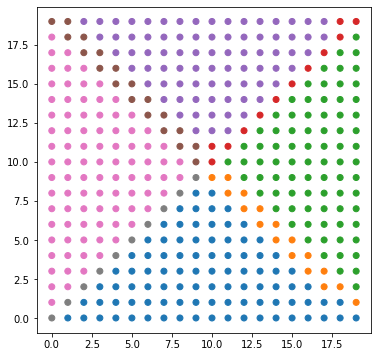

In [22]:

plt.figure(figsize=(6,6))
# create a dictionary to store unique coordinates and their responses
coord_dict = {}
# x,y=idx2coords(np.array(df.target_dino.values))
x,y=sim_df.x,sim_df.y
for i in range(len(x)):
    coord = (x[i], y[i])
    if coord not in coord_dict:
        coord_dict[coord] = []
    coord_dict[coord]=sim_df[(sim_df.y==coord[1])&(sim_df.x==coord[0])].response.values

# find the most common response for each unique coordinate
coords = []
most_common = []
for coord in coord_dict:
    coords.append(coord)
    most_common.append(Counter(coord_dict[coord]).most_common(1)[0][0])
# print(most_common)
plt.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c=most_common, cmap=cmap,vmin=-0.5, vmax=9.5)
# plt.show()
plt.savefig(f'2d_{model}_joint_{phase}.png')


x   y   response
0   0   0           0.183673
        1           0.102041
        2           0.030612
        3           0.020408
        4           0.030612
                      ...   
19  19  3           0.346535
        4           0.188119
        5           0.108911
        6           0.019802
        7           0.019802
Name: response, Length: 3200, dtype: float64